In [1]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [2]:
X = np.load("dataset/data-256.npy")
labels = np.load("dataset/label-256.npy")

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(labels)
y = to_categorical(y, 10)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2500, 256, 256, 3)
x_test shape:  (626, 256, 256, 3)
y_train shape:  (2500, 10)
y_test shape:  (626, 10)


In [6]:
# know neural ntwrk architecture # work in sequential model
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [7]:
# modelling 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(5,5), padding = "Same", activation="relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [8]:
# preprocess
from keras.preprocessing.image import ImageDataGenerator
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 96)       0

In [11]:
# Train the model
batch_size = 64
epochs = 70

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/70
39/39 [==============================] - 84s 2s/step - loss: 9.2214 - accuracy: 0.1679 - val_loss: 2.0620 - val_accuracy: 0.2923
Epoch 2/70
39/39 [==============================] - 82s 2s/step - loss: 1.9060 - accuracy: 0.2956 - val_loss: 1.9758 - val_accuracy: 0.2732
Epoch 3/70
39/39 [==============================] - 81s 2s/step - loss: 1.7930 - accuracy: 0.3415 - val_loss: 1.7913 - val_accuracy: 0.3546
Epoch 4/70
39/39 [==============================] - 83s 2s/step - loss: 1.6276 - accuracy: 0.4134 - val_loss: 1.6138 - val_accuracy: 0.4073
Epoch 5/70
39/39 [==============================] - 83s 2s/step - loss: 1.5503 - accuracy: 0.4479 - val_loss: 1.4848 - val_accuracy: 0.4649
Epoch 6/70
39/39 [==============================] - 82s 2s/step - loss: 1.4912 - accuracy: 0.4733 - val_loss: 1.4634 - val_accuracy: 0.4585
Epoch 7/70
39/39 [==============================] - 82s 2s/step - loss: 1.3892 - accuracy: 0.5074 - val_loss: 1.4209 - val_accuracy: 0.5032
Epoch 8/70
39/39 [==

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

20/20 [==============================] - 4s 198ms/step - loss: 0.9738 - accuracy: 0.7636


In [14]:
# Save the model
model.save("model/flower-recognition-model-70-epochs-256.h5")

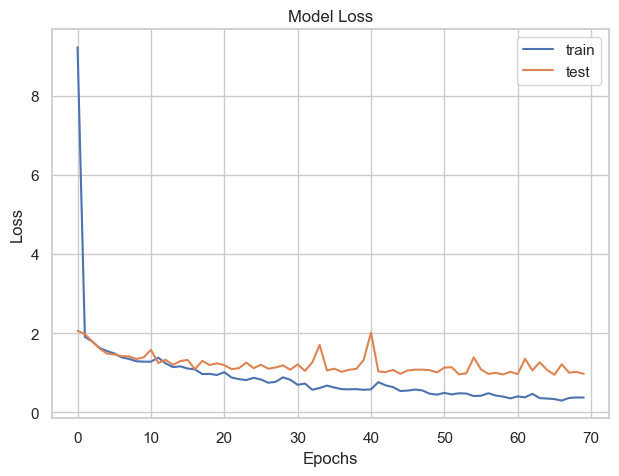

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

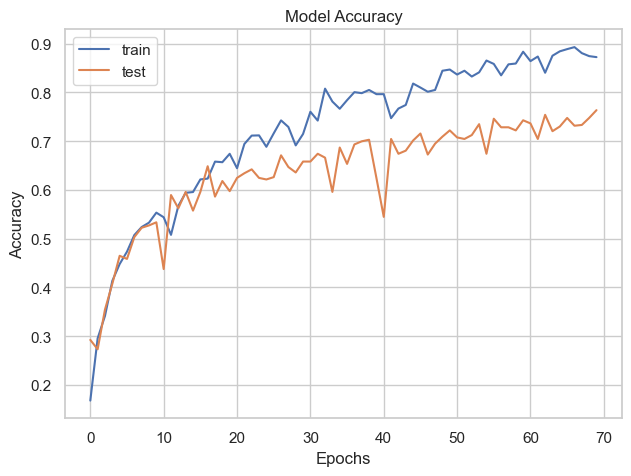

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [17]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred, axis=1)

20/20 [==============================] - 4s 183ms/step


In [43]:

# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

correct_count = 0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):   
        correct_count+=1

miss_count = 0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):   
        miss_count+=1

print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {miss_count}")

Correct Predictions: 478
Wrong Predictions: 148


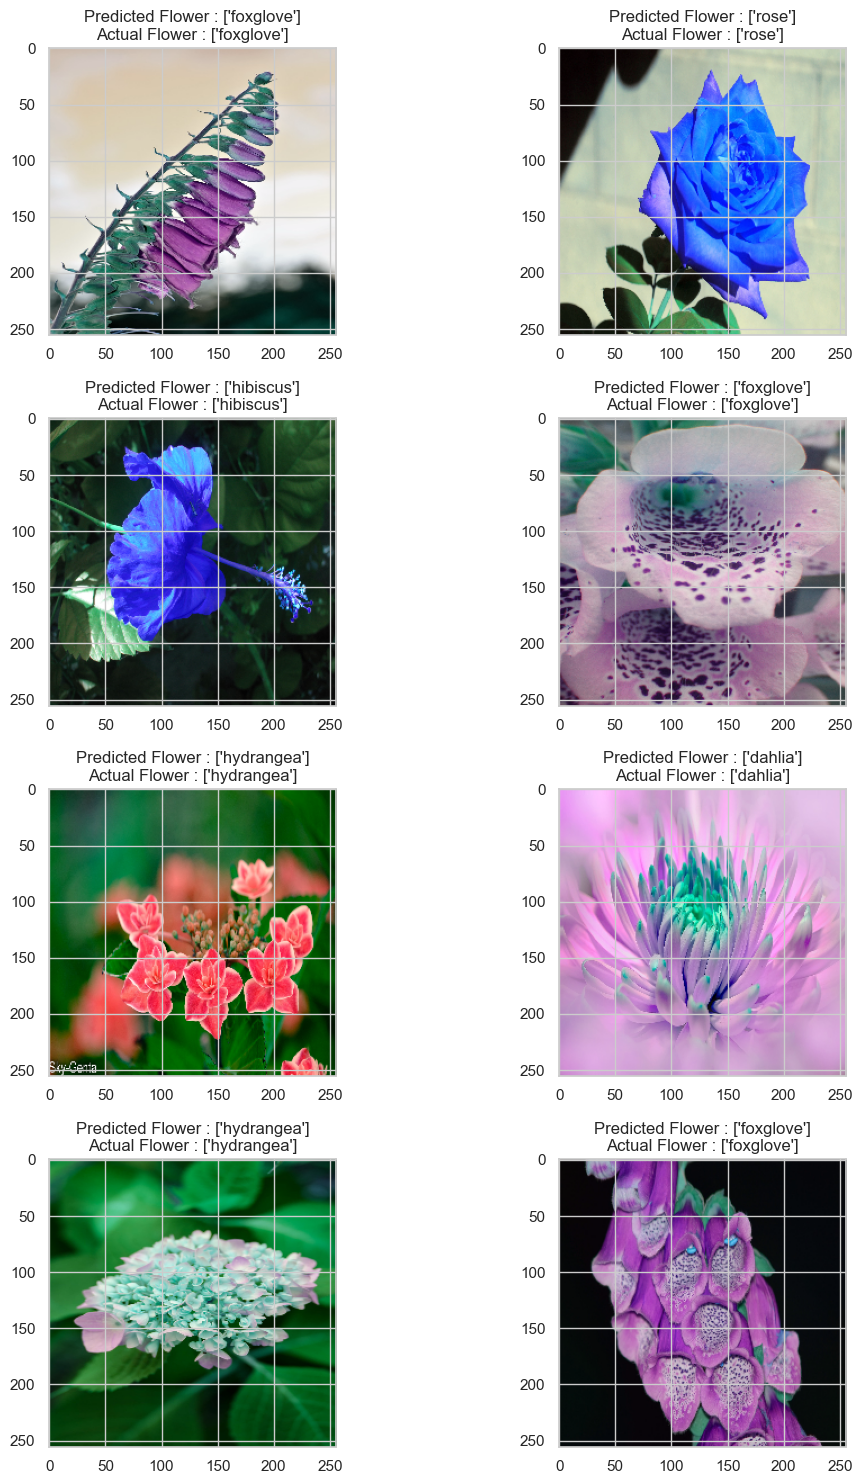

In [41]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(labelEncoder.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

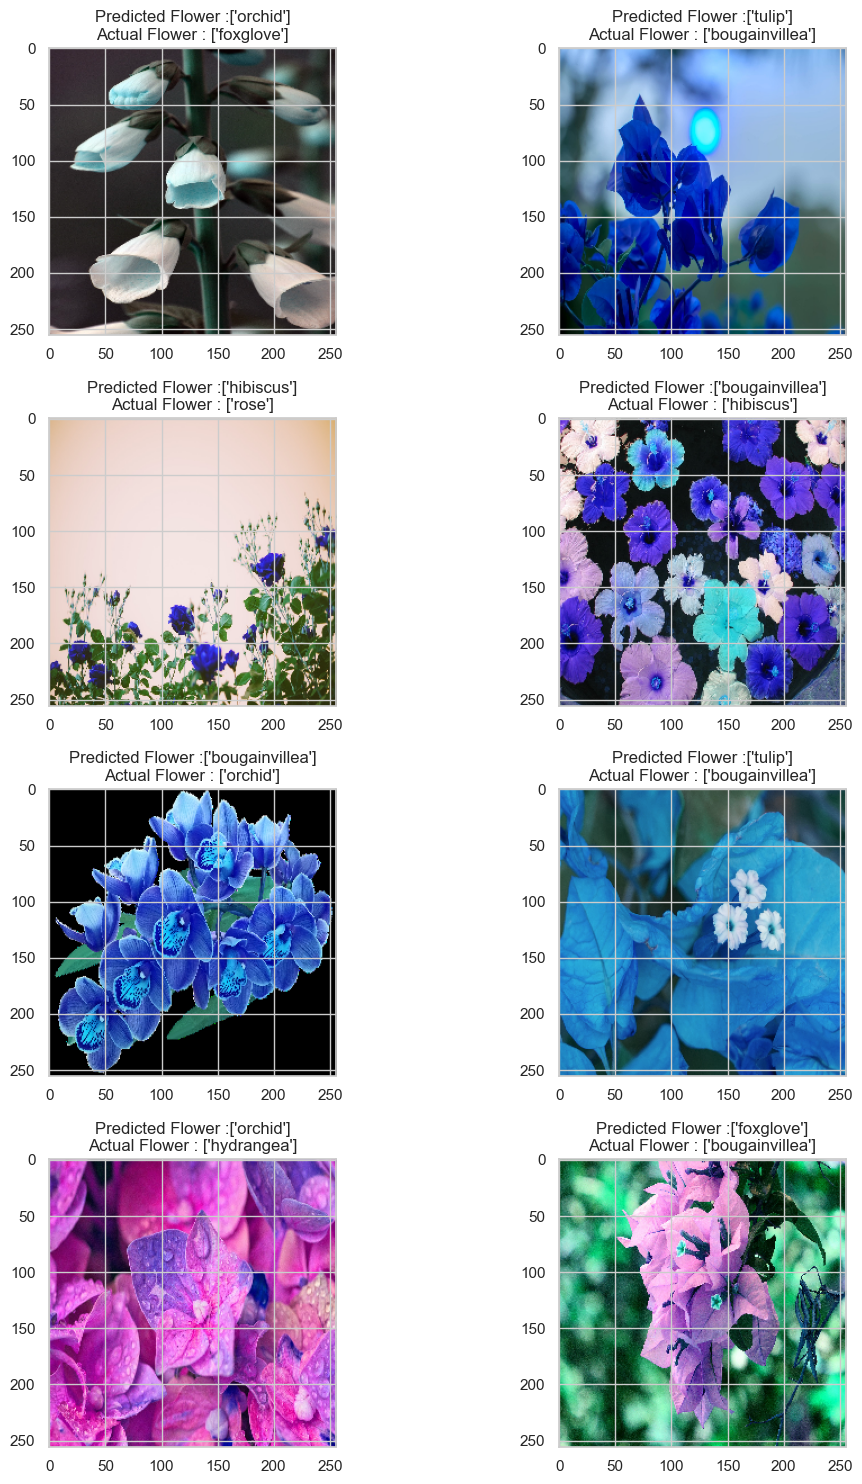

In [42]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(labelEncoder.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1